## Sine waves and application of (inverse) Fast Fourier Transform

Authors: Nico Kuijpers and Mickey Krekels

Modified by: Mark Goertz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Step 1: Read the CSV file
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/BVP.csv')

# Step 2: Preprocess the Data
# Drop the first two rows if they are not needed
df = df.drop([0, 1])

# Convert the BVP signal to a numpy array
bvp_signal = df.values.flatten()  # Flatten the array to a 1D array

Sine wave with a frequency of 5 Hz.

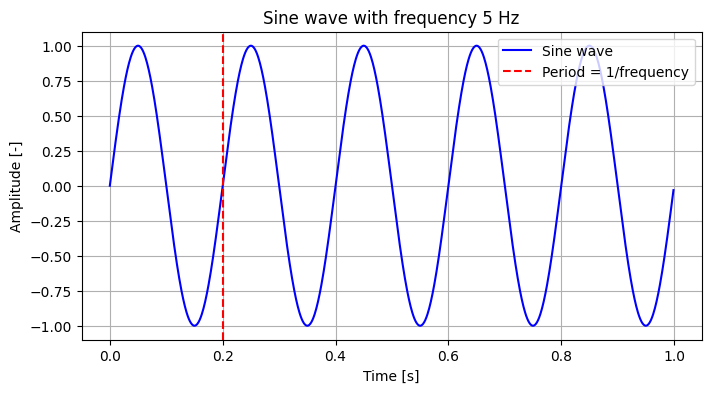

In [77]:
# Parameters
frequency = 5       # Frequency of sine wave in Hz
sample_rate = 1000  # Number of samples per second
duration = 1        # Duration of signal in seconds

# Time vector from 0 to given duration (in seconds) with given sample rate
t = np.linspace(0,duration,int(sample_rate * duration),endpoint=False)

# Sine wave signal
signal = np.sin(2 * np.pi * frequency * t)

# Plot the sine wave
plt.figure(figsize=(8,4))
plt.title('Sine wave with frequency {} Hz'.format(frequency))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [-]')
plt.plot(t, signal, label='Sine wave', color='b')

# Show the period by a red striped line
period = 1/frequency # period of signal in seconds
plt.axvline(x=period, color='r', linestyle='--', label='Period = 1/frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

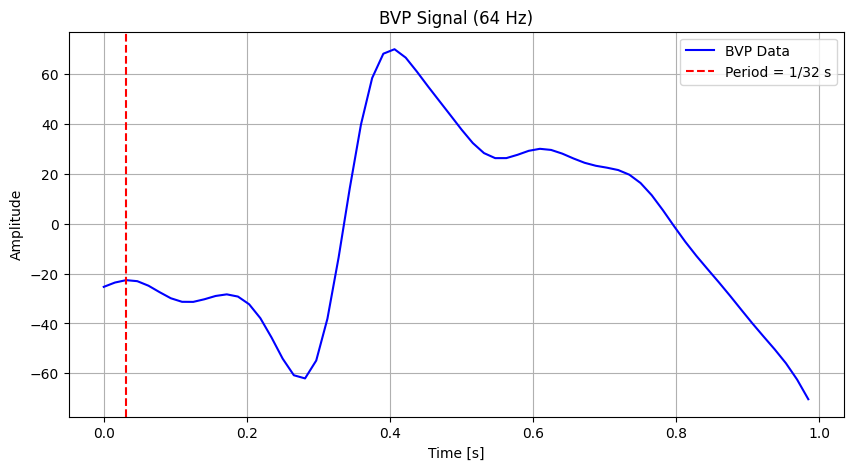

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/BVP.csv', header=None)

# Step 2: Preprocess the Data
df = df.iloc[263:327]

# Convert the BVP signal to a numpy array
bvp_signal = df.values.flatten()  # Flatten to a 1D array

# Parameters
sample_rate_bvp = 64   # BVP sampling rate in Hz
frequency = 32     # Desired frequency of the overlayed sine wave in Hz
duration_bvp = len(bvp_signal) / sample_rate_bvp  # Duration of the BVP data in seconds

# Time vector for the BVP data
t_bvp = np.linspace(0, duration_bvp, len(bvp_signal), endpoint=False)


# Calculate the period of the sine wave
period_sine = 1 / frequency

# Plot BVP data and overlay the sine wave
plt.figure(figsize=(10, 5))
plt.plot(t_bvp, bvp_signal, label='BVP Data', color='blue')
plt.title('BVP Signal (64 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.axvline(x=period_sine, color='r', linestyle='--', label=f'Period = 1/{frequency} s')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Sine wave with a frequency of 5 Hz and phase-shifted sine wave with the same frequency.

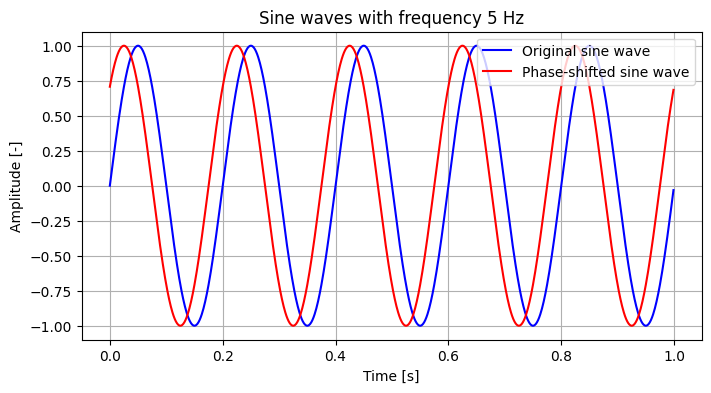

In [87]:
# Parameters
frequency = 5         # Frequency of sine wave in Hz
sample_rate = 1000    # Number of samples per second
duration = 1          # Duration of signal in seconds
phase_shift = np.pi/4 # Phase shift 

# Time vector from 0 to given duration (in seconds) with given sample rate
t = np.linspace(0,duration,int(sample_rate * duration),endpoint=False)

# Sine wave signal
signal = np.sin(2 * np.pi * frequency * t)

# Sine wave signal with phase shift
signal_phase_shift = np.sin(2 * np.pi * frequency * t + phase_shift)

# Plot the sine wave and the phase-shifted sine wave
plt.figure(figsize=(8,4))
plt.title('Sine waves with frequency {} Hz'.format(frequency))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [-]')
plt.plot(t, signal, label='Original sine wave', color='b')
plt.plot(t, signal_phase_shift, label='Phase-shifted sine wave', color='r')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

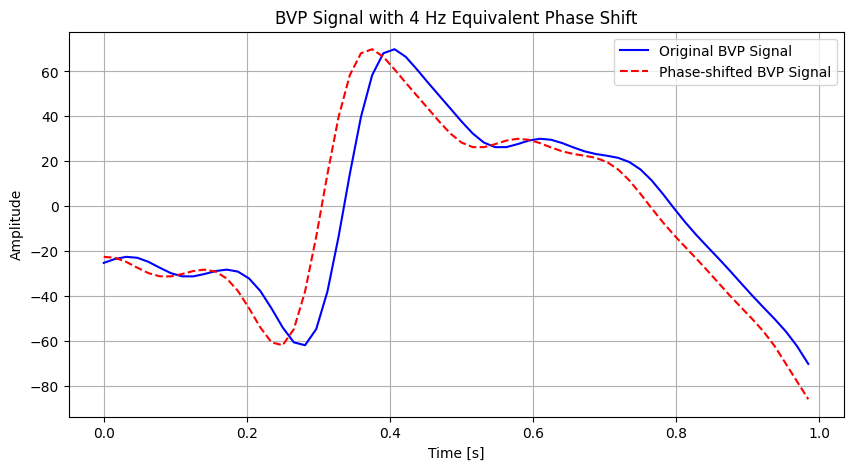

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Step 1: Read the CSV file
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/BVP.csv', header=None)

# Step 2: Preprocess the Data
# Selecting the specified rows (263 to 327) from your BVP data
df = df.iloc[263:327]
bvp_signal = df.values.flatten()  # Convert to a 1D array

# Parameters
sample_rate = 64             # Sample rate of BVP data in Hz
frequency = 4                # Frequency for the plot title reference
phase_shift = np.pi / 4      # Phase shift (45 degrees)
duration = len(bvp_signal) / sample_rate  # Duration based on sample rate and data length

# Time vector
t = np.linspace(0, duration, len(bvp_signal), endpoint=False)

# Step 3: Apply phase shift by shifting the signal in time
# Calculate equivalent time shift for phase_shift
time_shift = phase_shift / (2 * np.pi * frequency)

# Create a new time vector for the phase-shifted signal by shifting the original time vector
t_shifted = t + time_shift

# Interpolate the BVP signal to apply the time shift
interpolator = interp1d(t, bvp_signal, fill_value="extrapolate")
bvp_signal_phase_shifted = interpolator(t_shifted)

# Step 4: Plot original and phase-shifted BVP signals
plt.figure(figsize=(10, 5))
plt.plot(t, bvp_signal, label='Original BVP Signal', color='blue')
plt.plot(t, bvp_signal_phase_shifted, label='Phase-shifted BVP Signal', color='red', linestyle='--')
plt.title(f'BVP Signal with {frequency} Hz Equivalent Phase Shift')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Sum of two sine waves.

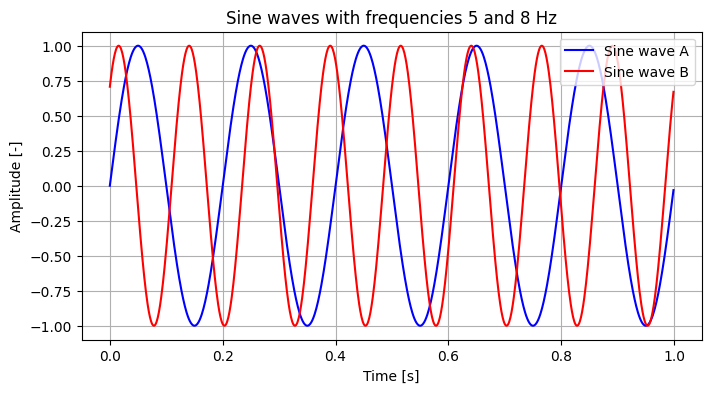

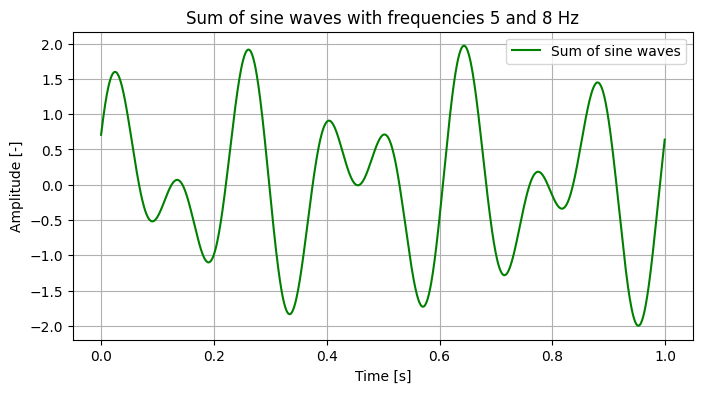

In [119]:
# Parameters
frequencyA = 5         # Frequency of sine wave A in Hz
frequencyB = 8         # Frequency of sine wave B in Hz
phase_shiftA = 0       # Phase shift of sine wave A
phase_shiftB = np.pi/4 # Phase shift of sine wave B
sample_rate = 1000     # Number of samples per second
duration = 1           # Duration of signal in seconds

# Time vector from 0 to given duration (in seconds) with given sample rate
t = np.linspace(0,duration,int(sample_rate * duration),endpoint=False)

# Sine wave signal A
signalA = np.sin(2 * np.pi * frequencyA * t + phase_shiftA)

# Sine wave signal B
signalB = np.sin(2 * np.pi * frequencyB * t + phase_shiftB)

# Sum of the two signal
signal_sum = signalA + signalB

# Plot sine waves
plt.figure(figsize=(8,4))
plt.title('Sine waves with frequencies {} and {} Hz'.format(frequencyA, frequencyB))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [-]')
plt.plot(t, signalA, label='Sine wave A', color='b')
plt.plot(t, signalB, label='Sine wave B', color='r')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot sum of sine waves
plt.figure(figsize=(8,4))
plt.title('Sum of sine waves with frequencies {} and {} Hz'.format(frequencyA, frequencyB))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [-]')
plt.plot(t, signal_sum, label='Sum of sine waves', color='g')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Step function and Fourier series (analytical).

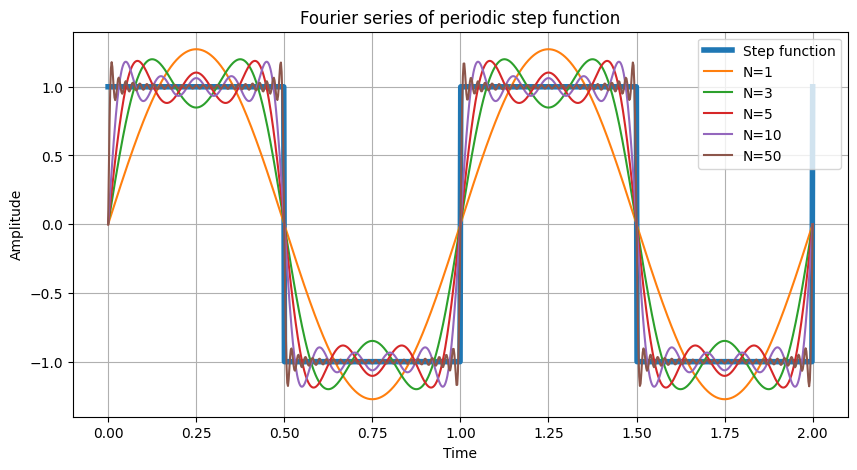

In [136]:
# Define step function
def step_function(t): return (-1)**np.floor(2*t).astype(int)

# Define function to calculate Fourier series for step function
def fourier_series(t, n_terms): 
    return sum((2/(n*np.pi)) * (1 - (-1)**n) * np.sin(n*2*np.pi*t) for n in range(1, n_terms + 1) )

# Time range
t = np.linspace(0, 2, 1000)

# Plot step function and Fourier series
n_terms_list = [1, 3, 5, 10 , 50]
plt.figure(figsize=(10,5))
plt.plot(t, step_function(t), label='Step function', linewidth=4)
for n_terms in n_terms_list: plt.plot(t, fourier_series(t, n_terms), label=f'N={n_terms}')
    
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Fourier series of periodic step function')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

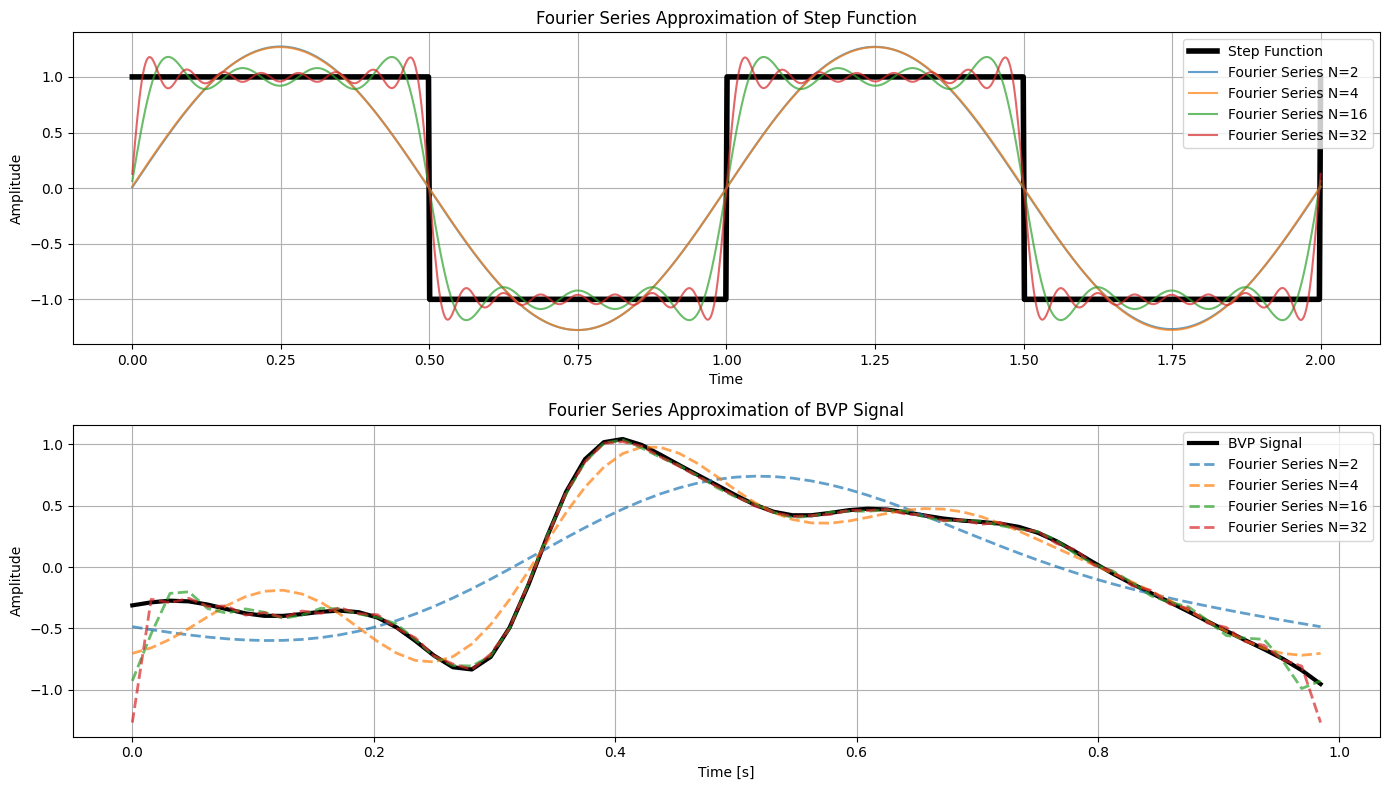

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the BVP data
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/BVP.csv', header=None)

# Step 2: Preprocess the BVP Data
# Select the specified rows (263 to 327) from your BVP data
df = df.iloc[263:327]
bvp_signal = df.values.flatten()  # Convert to a 1D array
bvp_signal = (bvp_signal - np.mean(bvp_signal)) / np.max(np.abs(bvp_signal))  # Normalize

# Define step function
def step_function(t):
    return (-1)**np.floor(2 * t).astype(int)

# Define function to calculate Fourier series for a given signal
def fourier_series(signal, t, n_terms):
    """Calculate Fourier series approximation for a given signal."""
    T = t[-1]  # Total duration
    n = len(t)  # Number of samples
    series = np.zeros_like(t)
    
    # Calculate the coefficients for the Fourier series
    for k in range(1, n_terms + 1):
        a_k = (2 / n) * np.sum(signal * np.cos(2 * np.pi * k * t / T))
        b_k = (2 / n) * np.sum(signal * np.sin(2 * np.pi * k * t / T))
        series += a_k * np.cos(2 * np.pi * k * t / T) + b_k * np.sin(2 * np.pi * k * t / T)
        
    return series

# Time range for the BVP signal
sampling_rate = 64  # 64 Hz
duration = len(bvp_signal) / sampling_rate
t_bvp = np.linspace(0, duration, len(bvp_signal), endpoint=False)

# Time range for the step function
t_step = np.linspace(0, 2, 1000)

# Fourier Series Approximations
n_terms_list = [2, 4, 16, 32]

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Plot the Step Function and its Fourier Series
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
plt.plot(t_step, step_function(t_step), label='Step Function', linewidth=4, color='black')
for n_terms in n_terms_list:
    plt.plot(t_step, fourier_series(step_function(t_step), t_step, n_terms), label=f'Fourier Series N={n_terms}', alpha=0.7)

plt.title('Fourier Series Approximation of Step Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)

# Plot the BVP Signal and its Fourier Series
plt.subplot(2, 1, 2)  # Second subplot
plt.plot(t_bvp, bvp_signal, label='BVP Signal', linewidth=3, color='black')

for n_terms in n_terms_list:
    plt.plot(t_bvp, fourier_series(bvp_signal, t_bvp, n_terms), linewidth=2, linestyle='--',label=f'Fourier Series N={n_terms}', alpha=0.7)

plt.title('Fourier Series Approximation of BVP Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()  # Adjusts the layout
plt.show()


Fourier transform of the sum of two sine waves using FFT.

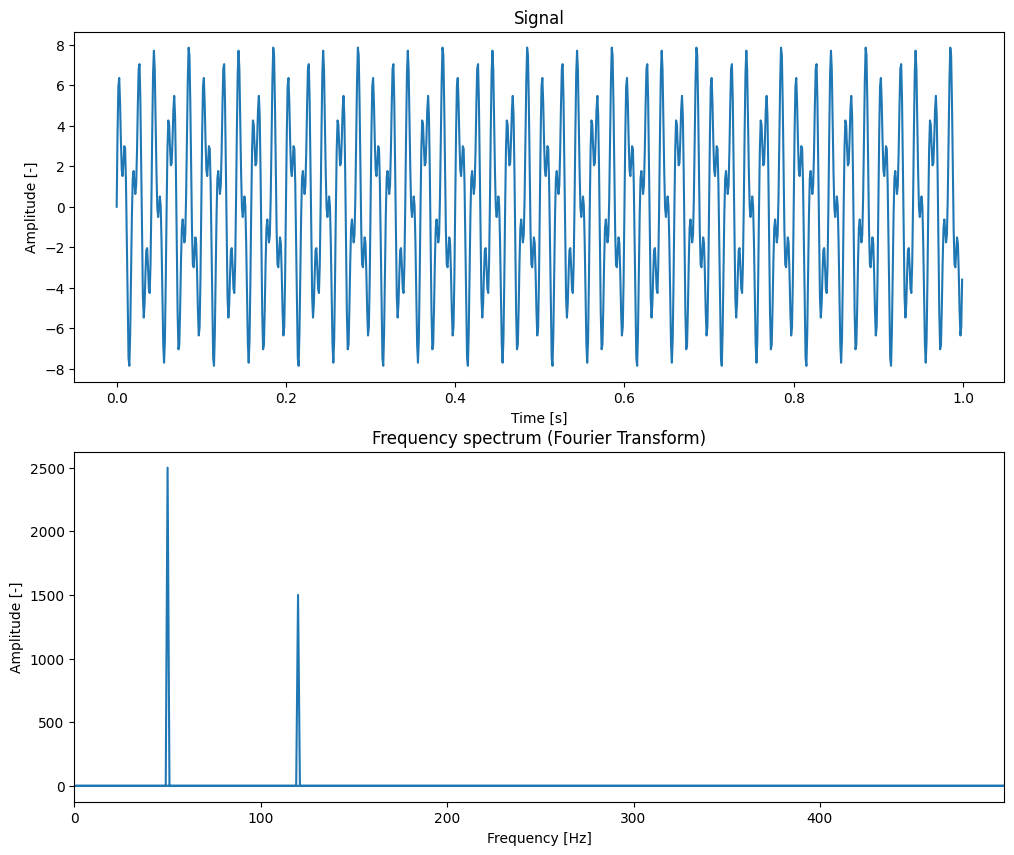

In [160]:
# Parameters
frequencyA = 50    # Frequency of signal A in Hz
frequencyB = 120   # Frequency of signal B in Hz
amplitudeA = 5     # Amplitude of signal A
amplitudeB = 3     # Amplidtue of signal B
sample_rate = 1000 # Sample rate in Hz
duration = 1       # Duration in seconds

# Time range
t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)

# Signal
signalA = amplitudeA * np.sin(2*np.pi*frequencyA*t)
signalB = amplitudeB * np.sin(2*np.pi*frequencyB*t)
signal = signalA + signalB

# Fast Fourier Transform (FFT) of signal
fft_values = np.fft.fft(signal)

# Frequencies corresponding to FFT components
frequencies = np.fft.fftfreq(len(signal), 1/sample_rate)

# Plot signal (top) and frequencies (bottom)
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(t, signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [-]')
plt.title('Signal')

plt.subplot(2,1,2)
plt.plot(frequencies, np.abs(fft_values))
plt.xlim(0,max(frequencies))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.title('Frequency spectrum (Fourier Transform)')
plt.tight_layout
plt.show()

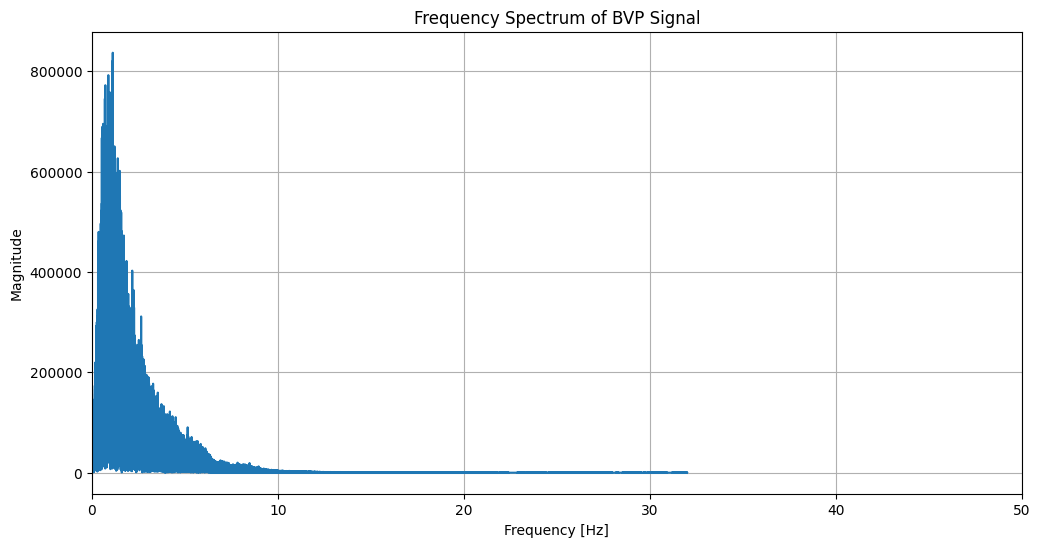

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your BVP signal
# Example loading from a CSV file
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/BVP.csv')
bvp_signal = df.values.flatten()  # Assuming your BVP data is in a single column

# Step 2: Define sampling parameters
sample_rate = 64  # or 32 Hz, depending on what you are using
duration = len(bvp_signal) / sample_rate

# Step 3: Apply FFT
fft_values = np.fft.fft(bvp_signal)
frequencies = np.fft.fftfreq(len(fft_values), 1/sample_rate)

# Step 4: Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title('Frequency Spectrum of BVP Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 50)  # Adjust based on your expected frequency range
plt.grid()
plt.show()


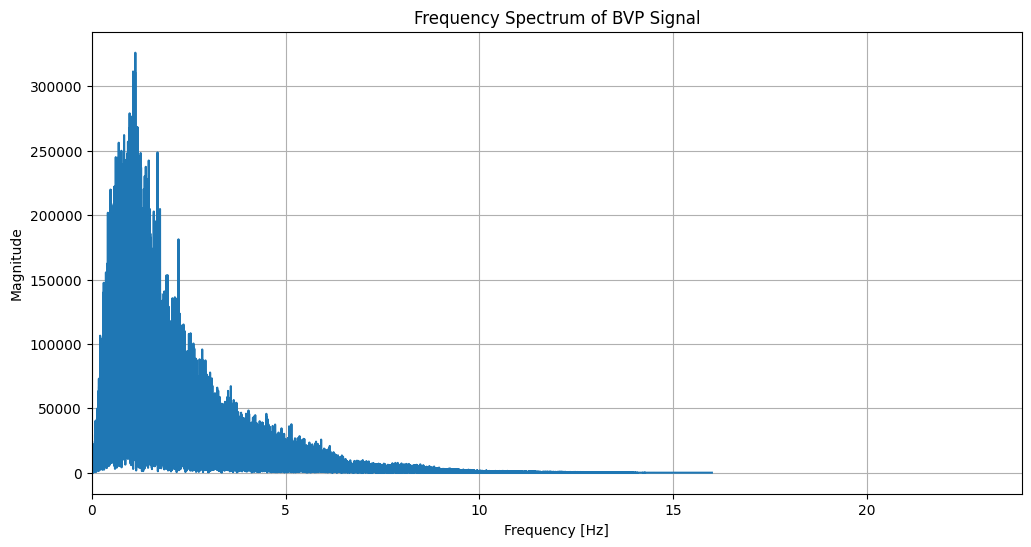

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  # For converting string representations of lists to actual lists

# Step 1: Load your BVP signal
df = pd.read_csv('C:/Master of Applied IT/data/unprocessed/WESAD/S2/wrist/S2.csv')

# Assuming the BVP values are under a column named 'BVP'
# Step 2: Convert string representation of lists to actual lists
bvp_data = df['BVP'].apply(ast.literal_eval)

# Step 2: Concatenate all arrays into a single array
bvp_signal = np.concatenate(bvp_data.values)
bvp_signal
# Step 3: Define sampling parameters
sample_rate = 32  # Sample rate in Hz
duration = len(bvp_signal) / sample_rate

# Step 4: Apply FFT
fft_values = np.fft.fft(bvp_signal)
frequencies = np.fft.fftfreq(len(fft_values), 1/sample_rate)

# Step 5: Calculate the magnitude spectrum
magnitude = np.abs(fft_values)

# Step 6: Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Only plot the positive frequencies
plt.title('Frequency Spectrum of BVP Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 24)  # Adjust based on your expected frequency range
plt.grid()
plt.show()